# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

In [90]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn
data = pd.read_csv('csv',sep = '\t')

In [91]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Предобработка данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


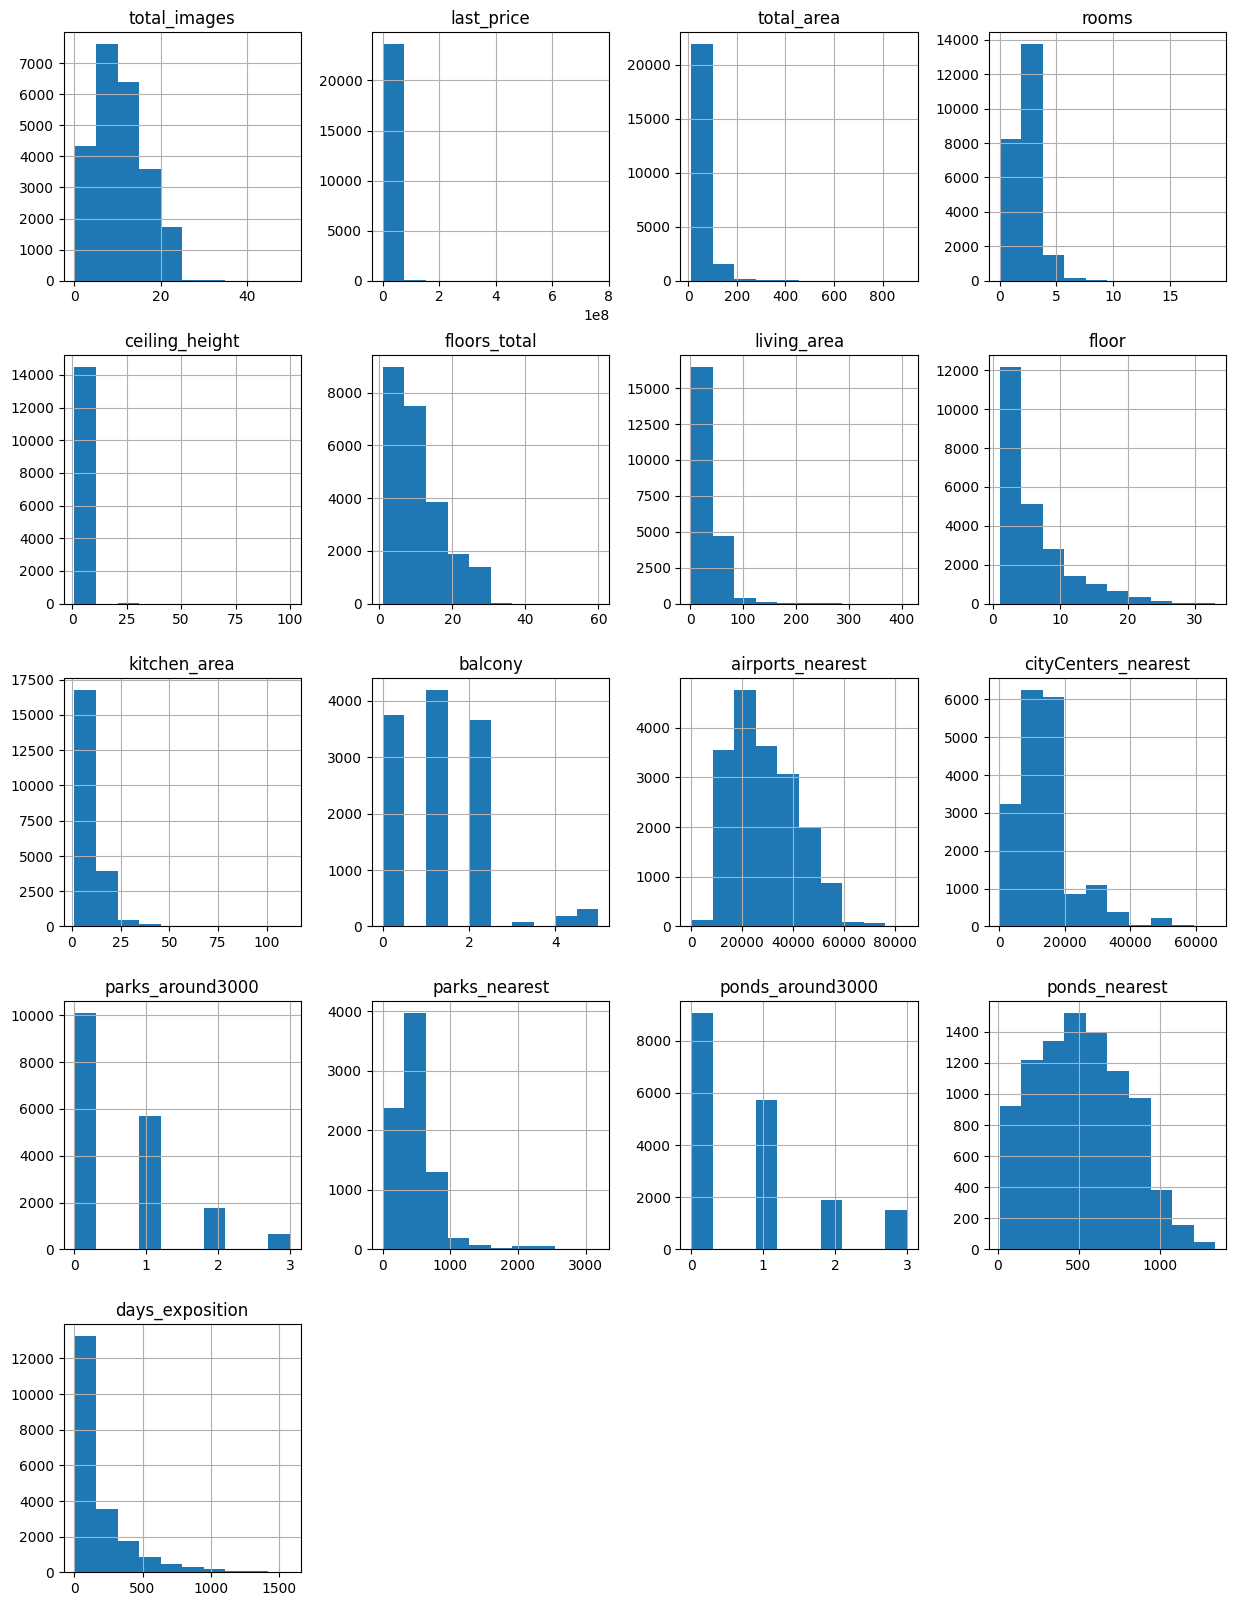

In [92]:
# Построим общую гистограмму для всех числовых столбцов таблицы
data.info()
data.hist(figsize=(15, 20))


data.describe()

In [93]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-info"> <b>Комментарии : </b>Больше всего пропусков в is_apartment, parks_nearest, ponds_nearest, balcony.
</div>

In [94]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [95]:

print(data['is_apartment'].value_counts())

print(data['is_apartment'].isnull().sum())

data['is_apartment'] = data['is_apartment'].fillna(False)

False    2725
True       50
Name: is_apartment, dtype: int64
20924


In [96]:

print(data['is_apartment'].isnull().sum())


0


In [97]:

data['balcony'] = data['balcony'].fillna(0)
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [98]:

data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [99]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [100]:
#эти кучи нулей после запятой меня еще на поиске мин и макс очень путали

data['last_price'] = data['last_price'].astype('int64')
data['total_area'] = data['total_area'].astype('int64')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  int64  
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [101]:
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest','parks_around3000':'parks_around_3000','ponds_around3000':'ponds_around_3000'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  int64  
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [102]:

print(len(data['locality_name']))
print(len(data['locality_name'].unique()))

23699
364


In [103]:

dupl = ['садоводческое некоммерческое товарищество','городской поселок','городской посёлок','деревня','поселок','посёлок','посёлок при железнодорожной станции','посёлок станции',
        'садовое товарищество','село','городского типа','при железнодорожной станции','станции']
name = ''
data['locality_name'] = data['locality_name'].replace(dupl,name,regex=True)
print(data['locality_name'].sort_values().unique()) #прям сразу задышалось легче


['  Большая Ижора' '  Важины' '  Вещево' '  Вознесенье' '  Вырица'
 '  Громово' '  Дружная Горка' '  Дубровка' '  Ефимовский' '  Кондратьево'
 '  Корнево' '  Красный Бор' '  Кузнечное' '  Кузьмоловский' '  Лебяжье'
 '  Лесогорский' '  Лужайка' '  Мга' '  Назия' '  Никольский' '  Павлово'
 '  Приветнинское' '  Приладожский' '  Рахья' '  Рощино' '  Рябово'
 '  Свирь' '  Сиверский' '  Синявино' '  Советский' '  Тайцы' '  Токсово'
 '  Ульяновка' '  Форносово' '  имени Морозова' '  имени Свердлова'
 ' Агалатово' ' Александровская' ' Алексеевка' ' Аннино' ' Аро'
 ' Барышево' ' Батово' ' Бегуницы' ' Белогорка' ' Белоостров'
 ' Большая Вруда' ' Большая Ижора' ' Большая Пустомержа'
 ' Большие Колпаны' ' Большое Рейзино' ' Большой Сабск' ' Бор'
 ' Борисова Грива' ' Бугры' ' Будогощь' ' Ваганово' ' Вартемяги'
 ' Вахнова Кара' ' Виллози' ' Возрождение' ' Войсковицы' ' Войскорово'
 ' Володарское' ' Выскатка' ' Высокоключевой' ' Гаврилово' ' Гарболово'
 ' Гладкое' ' Глажево' ' Глебычево' ' Глинка' '

In [104]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

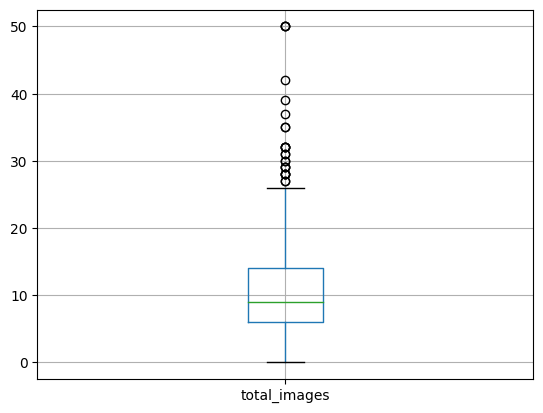

In [105]:
data.boxplot('total_images');

In [106]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

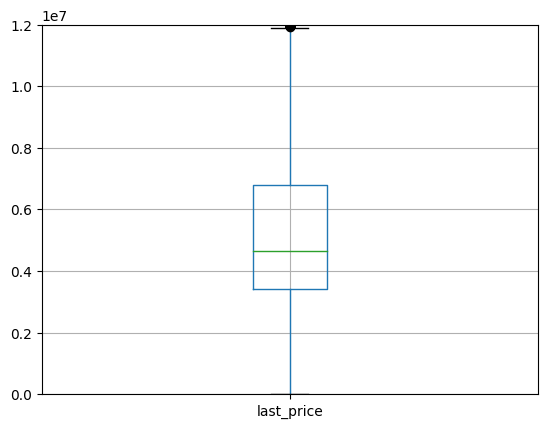

In [107]:
data.boxplot('last_price')
plt.ylim(0, 12000000);

In [108]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [109]:
data['total_area'].describe()

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

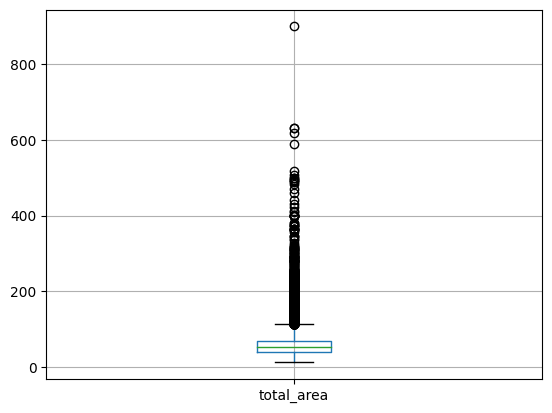

In [110]:
data.boxplot('total_area');

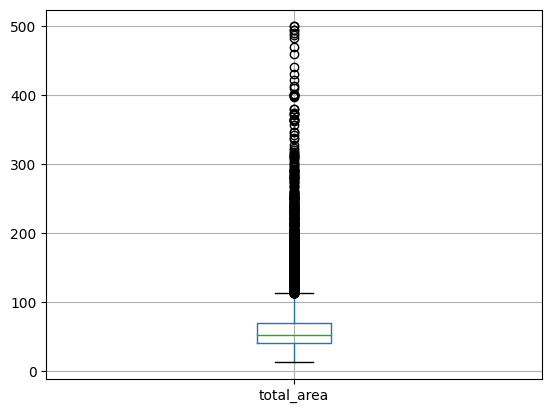

In [111]:
data = data.loc[data['total_area'] <= 500]
data.boxplot('total_area');

In [112]:
data['rooms'].describe()

count    23692.000000
mean         2.068715
std          1.071268
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

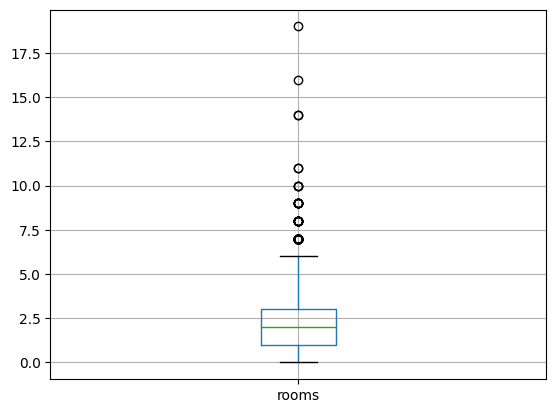

In [113]:
data.boxplot('rooms');

In [114]:
data['floors_total'].describe()

count    23606.000000
mean        10.674532
std          6.596946
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

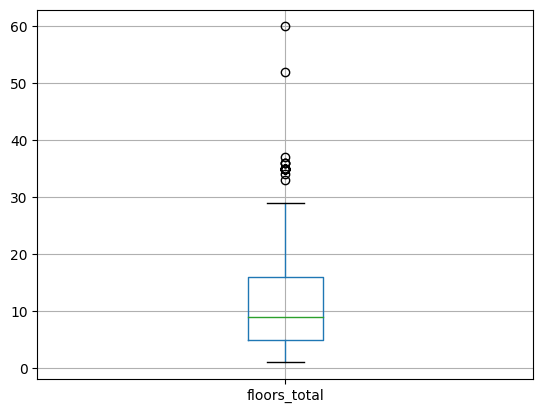

In [115]:
data.boxplot('floors_total');

In [116]:
data['ceiling_height'].describe()

count    14499.000000
mean         2.771210
std          1.261136
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

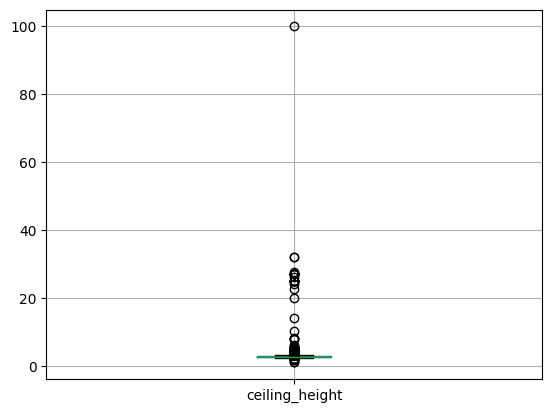

In [117]:
data.boxplot('ceiling_height');

In [118]:
def function(row):
    if row > 20:
        return row / 10
row = data['ceiling_height']
data['ceiling_height'] = data['ceiling_height'].apply(function)

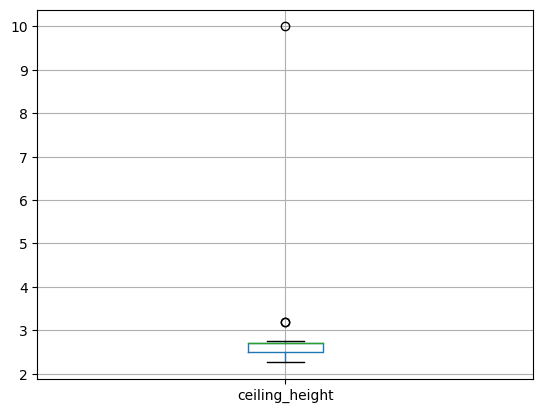

In [119]:
data.boxplot('ceiling_height');

In [120]:
data['living_area'].describe()

count    21790.000000
mean        34.374064
std         21.427431
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        347.500000
Name: living_area, dtype: float64

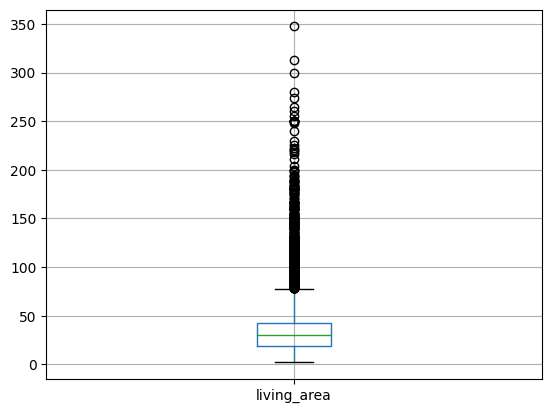

In [121]:
data.boxplot('living_area');

In [122]:
data['floor'].describe()

count    23692.000000
mean         5.891904
std          4.884294
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

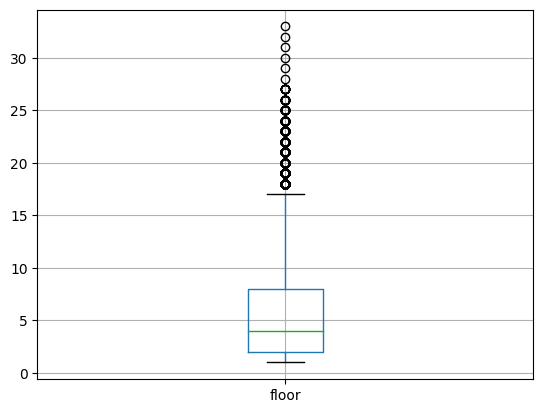

In [123]:
data.boxplot('floor');

In [124]:
data['balcony'].describe()

count    23692.000000
mean         0.591170
std          0.959394
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

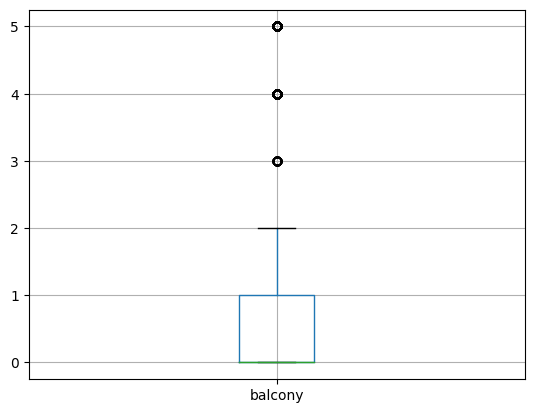

In [125]:
data.boxplot('balcony');

In [126]:
data['airports_nearest'].describe()

count    18151.000000
mean     28794.273814
std      12632.771036
min          0.000000
25%      18582.000000
50%      26726.000000
75%      37276.000000
max      84869.000000
Name: airports_nearest, dtype: float64

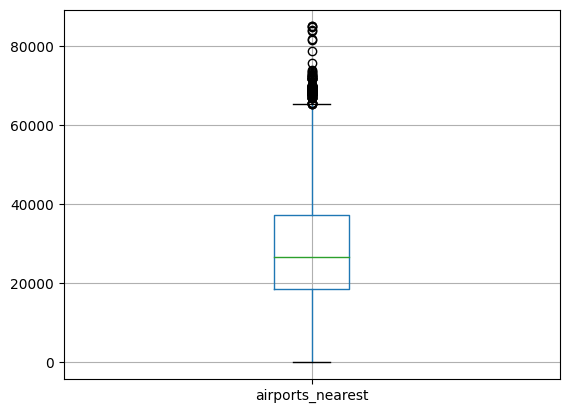

In [127]:
data.boxplot('airports_nearest');

In [128]:
data['city_centers_nearest'].describe()

count    18173.000000
mean     14194.798052
std       8608.114252
min        181.000000
25%       9238.000000
50%      13101.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

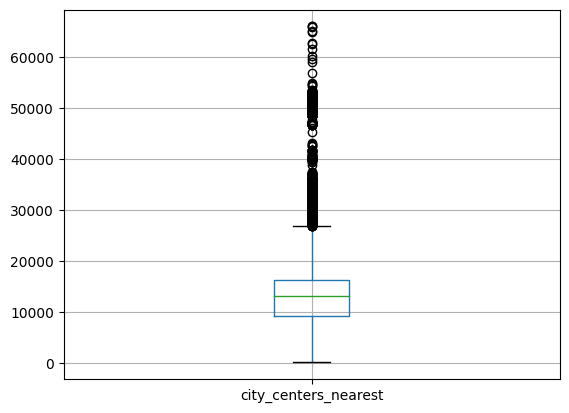

In [129]:
data.boxplot('city_centers_nearest');

In [130]:
data['ponds_around_3000'].describe()

count    18174.000000
mean         0.770001
std          0.938270
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

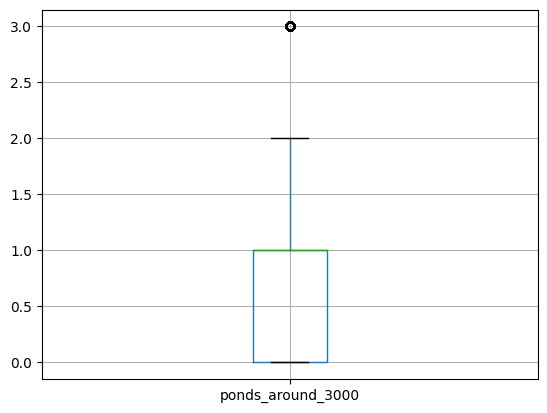

In [131]:
data.boxplot('ponds_around_3000');

In [132]:
data['ponds_nearest'].describe()

count    9105.000000
mean      518.103240
std       277.731111
min        13.000000
25%       294.000000
50%       502.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

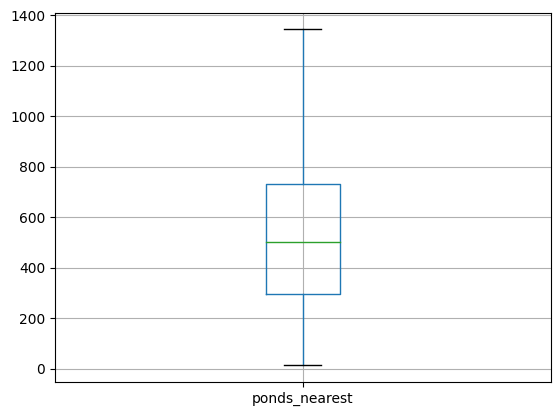

In [133]:
data.boxplot('ponds_nearest');

In [134]:
data['days_exposition'].describe()

count    20514.000000
mean       180.860096
std        219.655865
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

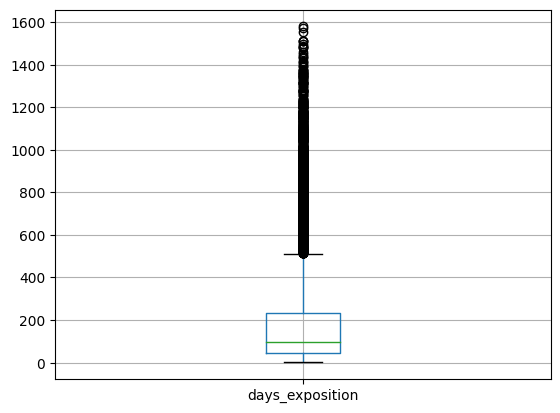

In [135]:
data.boxplot('days_exposition');

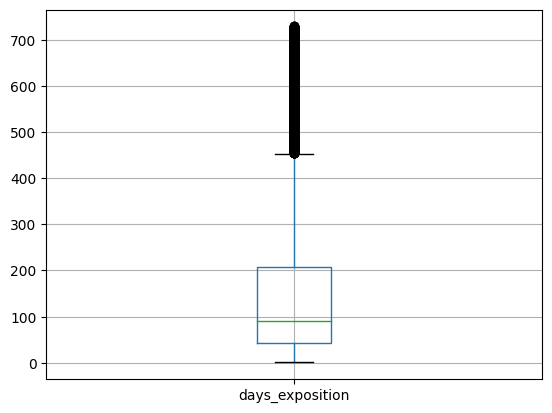

In [136]:
data = data.loc[data['days_exposition'] <= 730]
data.boxplot('days_exposition');

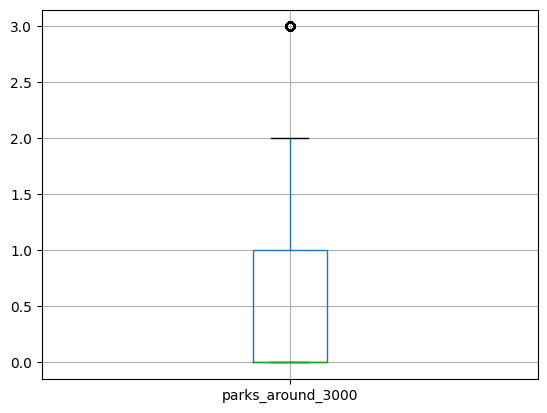

In [137]:
data.boxplot('parks_around_3000');

In [138]:
data['parks_nearest'].describe()

count    6635.000000
mean      489.160211
std       341.496621
min         1.000000
25%       286.000000
50%       451.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

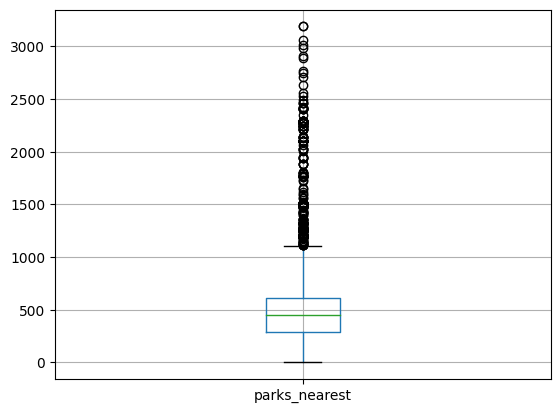

In [139]:
data.boxplot('parks_nearest');

In [140]:
data.duplicated().sum()

0

In [141]:

data['price_meter'] = data['last_price']/data['total_area']

In [142]:


print(data.head(15))

    total_images  last_price  total_area first_day_exposition  rooms  \
1              7     3350000          40  2018-12-04T00:00:00      1   
2             10     5196000          56  2015-08-20T00:00:00      2   
3              0    64900000         159  2015-07-24T00:00:00      3   
4              2    10000000         100  2018-06-19T00:00:00      2   
5             10     2890000          30  2018-09-10T00:00:00      1   
6              6     3700000          37  2017-11-02T00:00:00      1   
8             20     2900000          33  2018-05-23T00:00:00      1   
9             18     5400000          61  2017-02-26T00:00:00      3   
10             5     5050000          39  2017-11-16T00:00:00      1   
11             9     3300000          44  2018-08-27T00:00:00      2   
12            10     3890000          54  2016-06-30T00:00:00      2   
13            20     3550000          42  2017-07-01T00:00:00      2   
14             1     4400000          36  2016-06-23T00:00:00   

In [143]:

#расстояние до центра города в километрах

data['distance_km'] = round(data['city_centers_nearest'] / 1000)

### Исследовательский анализ данных

count    19764.000000
mean        58.014117
std         32.397904
min         12.000000
25%         39.000000
50%         50.000000
75%         67.000000
max        500.000000
Name: total_area, dtype: float64


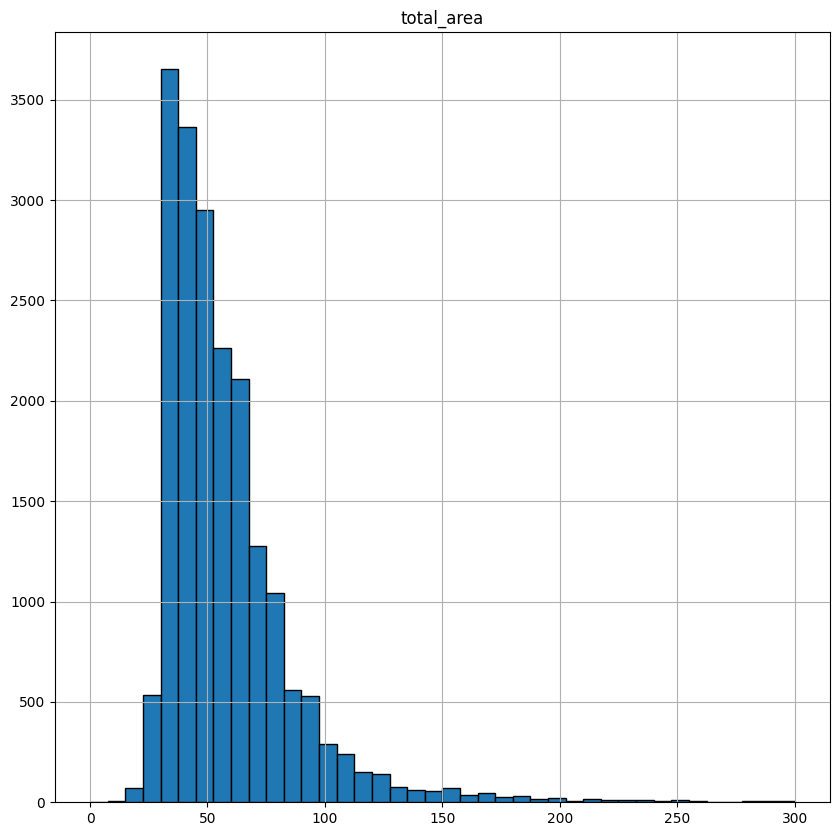

In [144]:


data.hist('total_area',bins=40,range=(0,300),figsize = (10,10),ec='black');

print(data['total_area'].describe())

In [145]:
#больше всего квартир в диапоазоне 35-50 метров, меьнше всего >170 примерно

count    18107.000000
mean        33.161708
std         20.391140
min          2.000000
25%         18.200000
50%         29.800000
75%         41.000000
max        347.500000
Name: living_area, dtype: float64


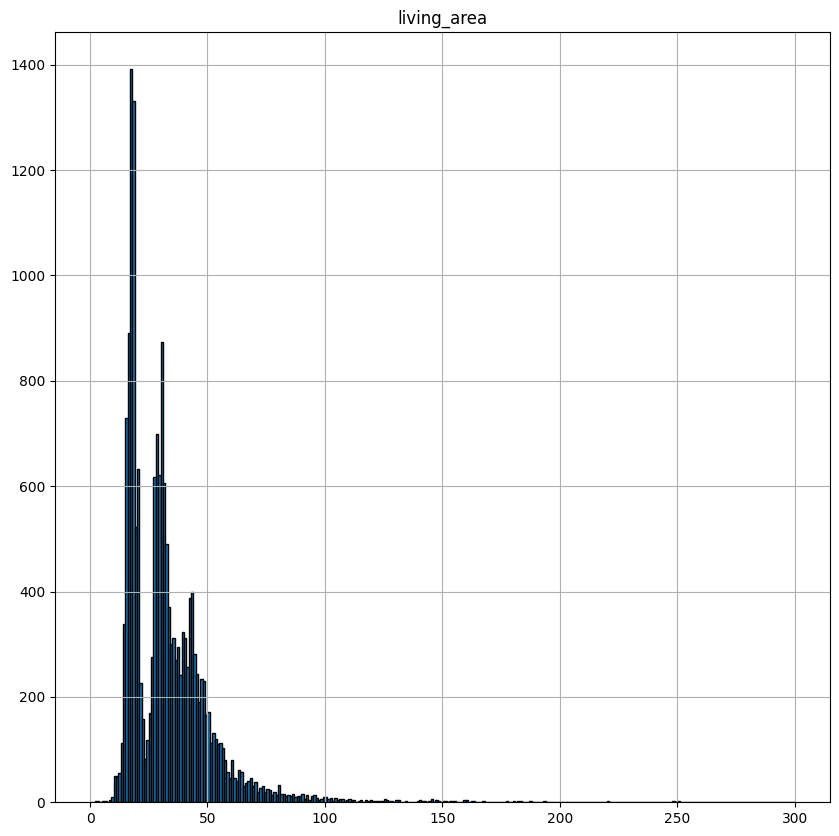

In [146]:
data.hist('living_area',bins=300,range=(0,300),figsize = (10,10),ec='black');

print(data['living_area'].describe())

In [147]:
#с жилплощадью примерно так же, чем она больше, тем ее меньше, пик примерно на 30


array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

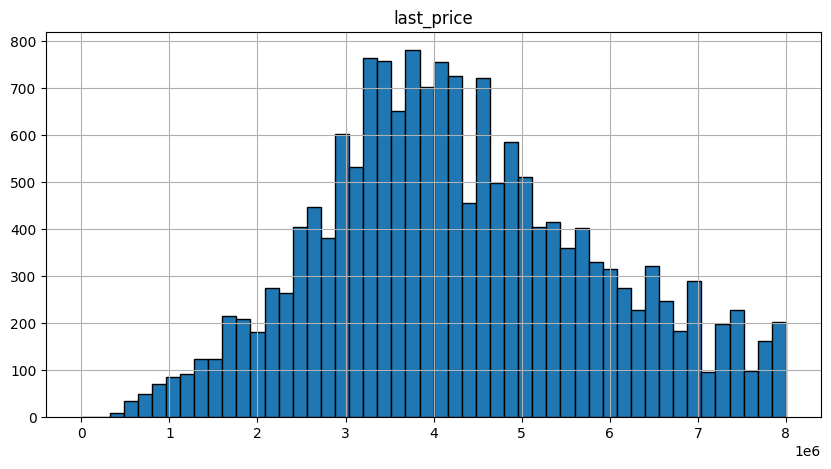

In [148]:
#цены

data.hist('last_price',bins= 50,range=(0,8000000),figsize = (10,5),ec='black')

<Axes: >

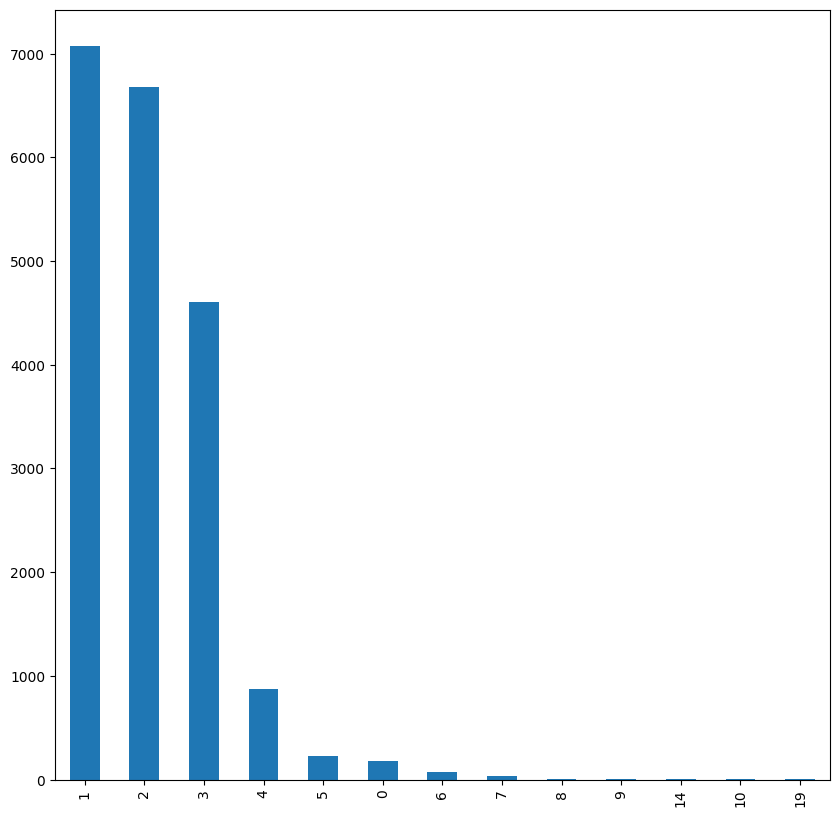

In [149]:


data['rooms'].value_counts().plot.bar(figsize = (10,10))

array([[<Axes: title={'center': 'floor'}>]], dtype=object)

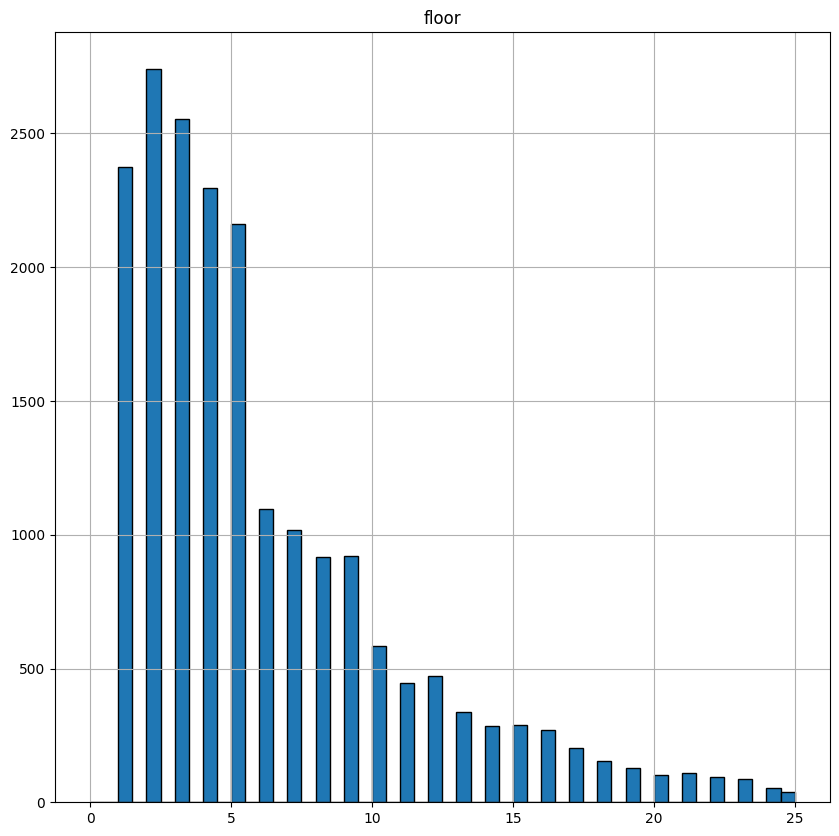

In [150]:
#посмотрим по этажам

data.hist('floor',bins= 50,range=(0,25),figsize = (10,10),ec='black')

<div class="alert alert-info"> <b>Комментарий: </b>3 и 4 этажи лидируют, 2 тоже популярный</div>

array([[<Axes: title={'center': 'parks_nearest'}>]], dtype=object)

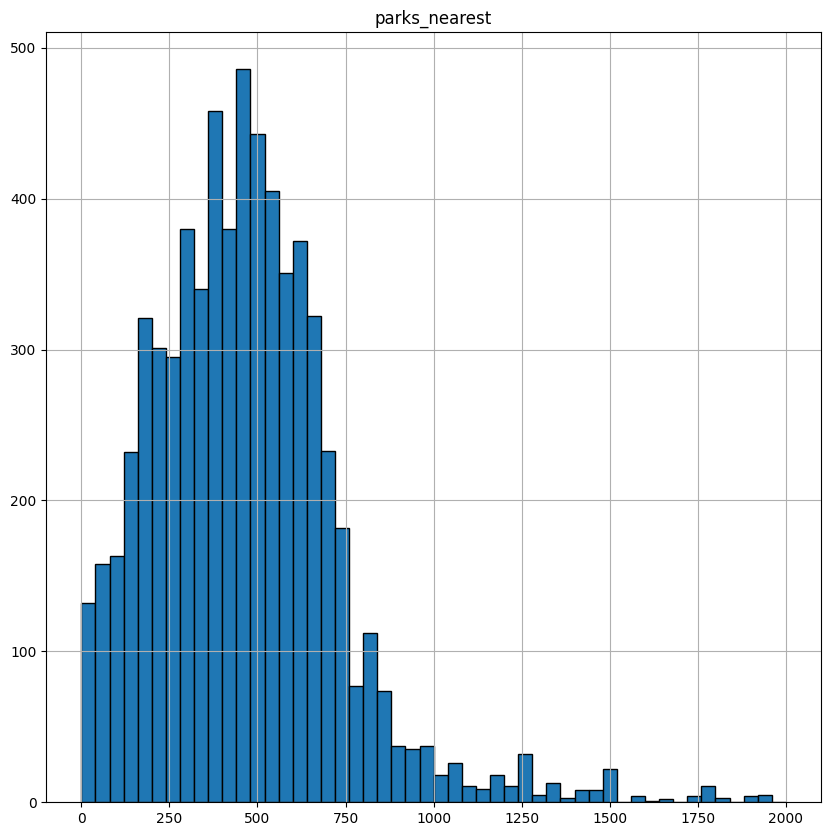

In [151]:
#посмотрим по расстоянию до парков, это должно сильно влиять

data.hist('parks_nearest',bins= 50,range=(0,2000),figsize = (10,10),ec='black')

<div class="alert alert-info"> <b>Комментари1 : </b> очень много всего от 500 м</div>

array([[<Axes: title={'center': 'airports_nearest'}>]], dtype=object)

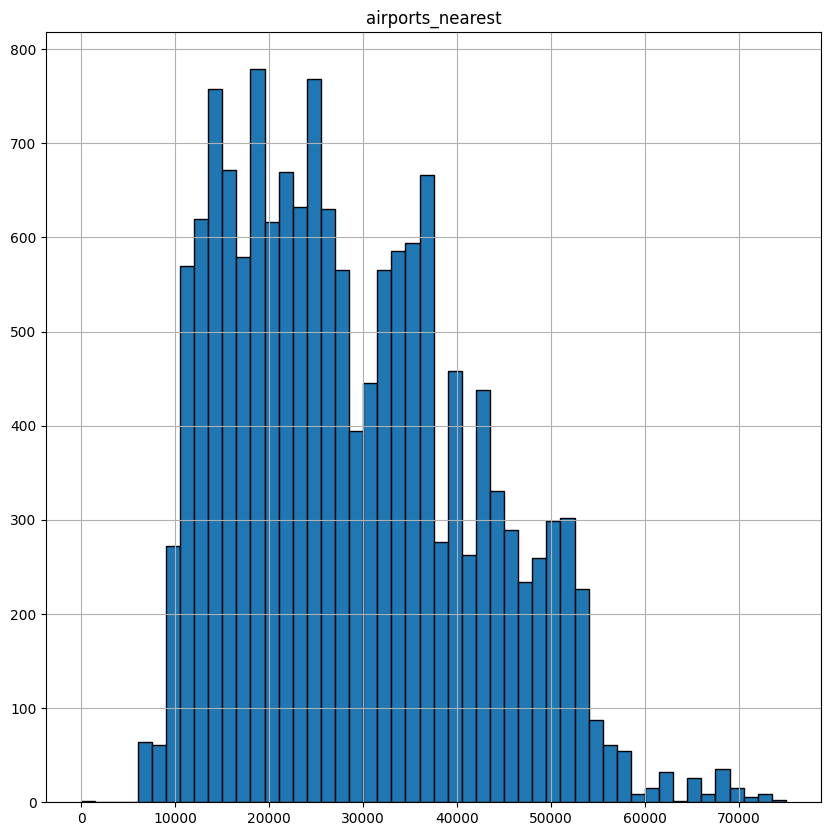

In [152]:
#а что по аэропортам?

data.hist('airports_nearest',bins= 50,range=(0,75000),figsize = (10,10),ec='black')

In [153]:
#больше всего во второй и третий месяцы (февраль и март), меньше всего в пятый

In [154]:
#день, месяц и год

data['day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday #а зачем...

data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year


In [155]:
#тип этажа квартиры (значения — «первый», «последний», «другой»

def type(row):
    x = row['floor']
    y = row['floors_total']
    if x == 1:
        return 'первый'
    if x == y:
        return 'последний'
    else:
        return 'другой'
data['floors_type'] = data.apply(type,axis =1)

data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,distance_km,day,month,year,floors_type
1,7,3350000,40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,83750.000000,19.0,1,12,2018,первый
2,10,5196000,56,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,14.0,3,8,2015,другой
3,0,64900000,159,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.100629,7.0,4,7,2015,другой
4,2,10000000,100,2018-06-19T00:00:00,2,NaN,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,8.0,1,6,2018,другой
5,10,2890000,30,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,False,...,NaN,NaN,NaN,55.0,96333.333333,NaN,0,9,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000,72,2016-10-13T00:00:00,2,NaN,25.0,40.3,7,False,...,NaN,1.0,806.0,519.0,131527.777778,4.0,3,10,2016,другой
23692,2,1350000,30,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,False,...,NaN,NaN,NaN,413.0,45000.000000,NaN,4,7,2017,другой
23693,9,4600000,62,2016-08-05T00:00:00,3,NaN,9.0,40.0,8,False,...,352.0,1.0,675.0,239.0,74193.548387,34.0,4,8,2016,другой
23695,14,3100000,59,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.372881,NaN,0,1,2018,другой


array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

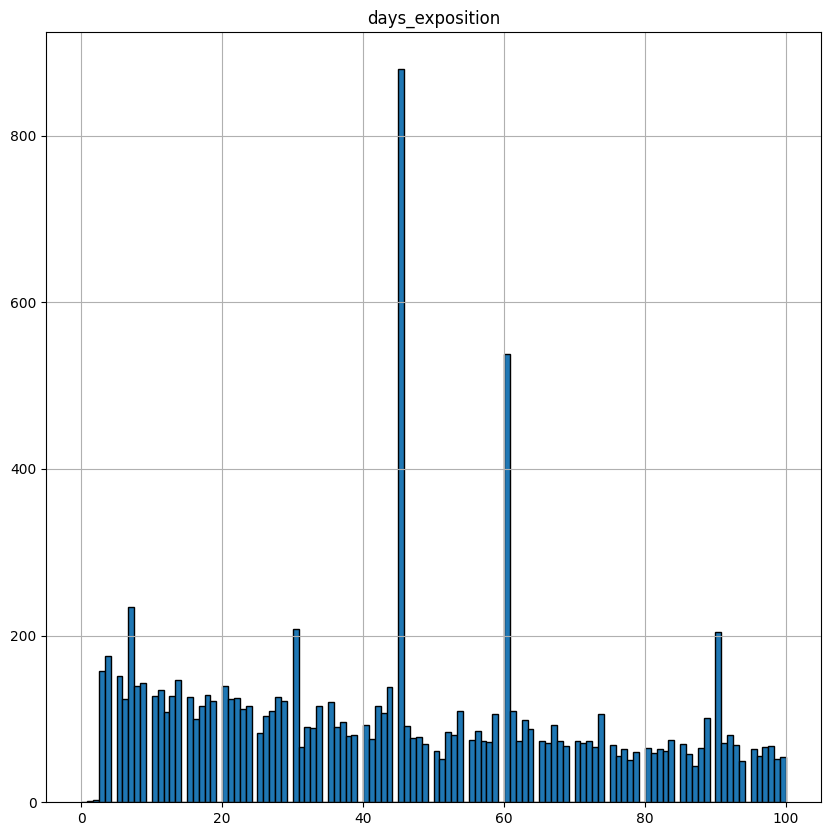

In [156]:
data.hist('days_exposition',bins= 120,range=(0,100),figsize = (10,10),ec='black')

In [157]:
data['days_exposition'].describe()

count    19764.000000
mean       151.017001
std        156.308015
min          1.000000
25%         43.000000
50%         90.000000
75%        207.000000
max        729.000000
Name: days_exposition, dtype: float64

In [158]:
data['days_exposition'].median()

90.00000000000001

0.6124806879014144


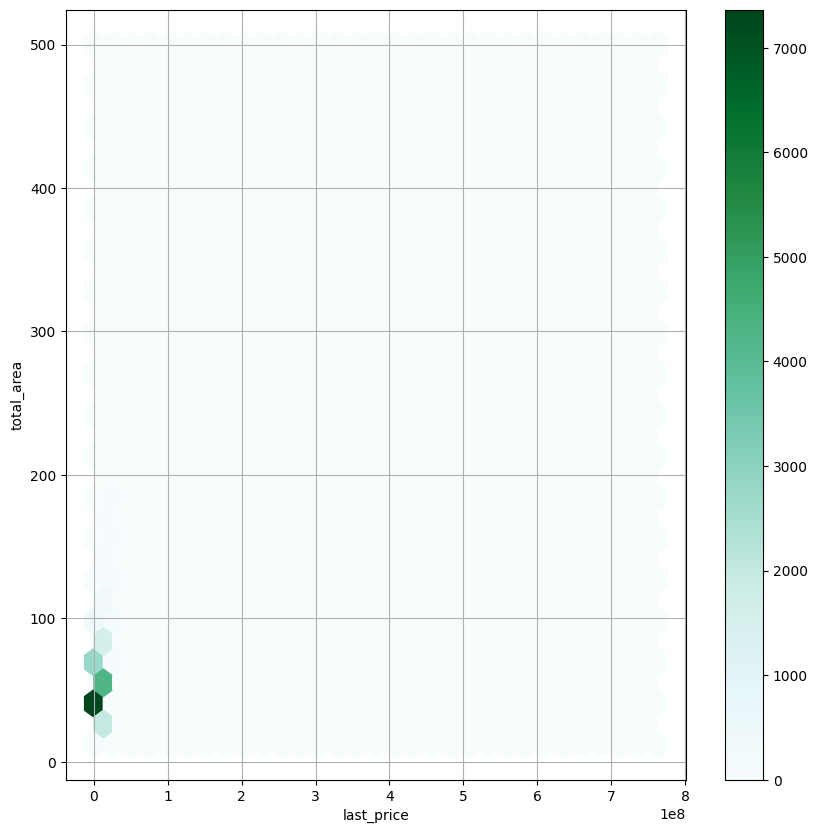

In [159]:
data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=30, figsize=(10, 10), sharex=False, grid=True)

print(data['last_price'].corr(data['total_area']))

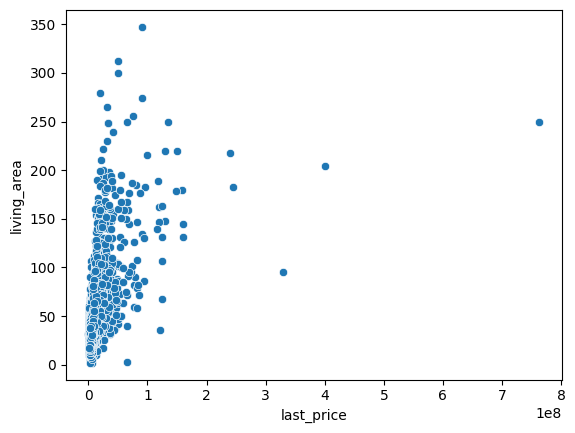

In [160]:
seaborn.scatterplot(data = data,x='last_price',y='living_area');

0.34283063474725783


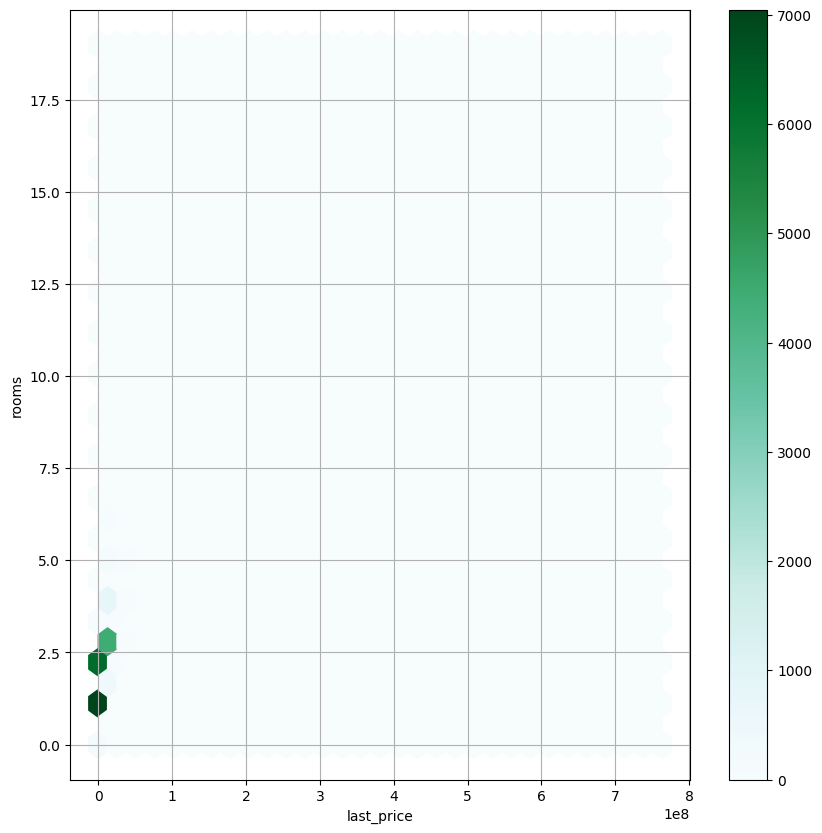

In [161]:
data.plot(x='last_price', y='rooms', kind='hexbin', gridsize=30, figsize=(10, 10), sharex=False, grid=True)
print(data['last_price'].corr(data['rooms']))

0.48465220954447347


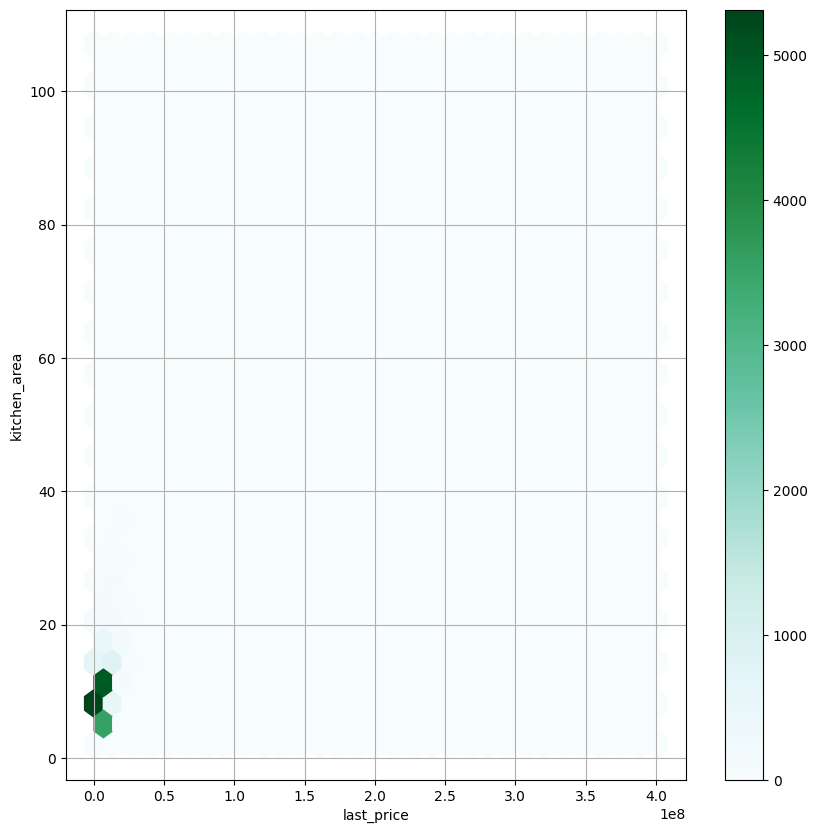

In [162]:
data.plot(x='last_price', y='kitchen_area', kind='hexbin', gridsize=30, figsize=(10, 10), sharex=False, grid=True)
print(data['last_price'].corr(data['kitchen_area']))

<Axes: xlabel='floors_type'>

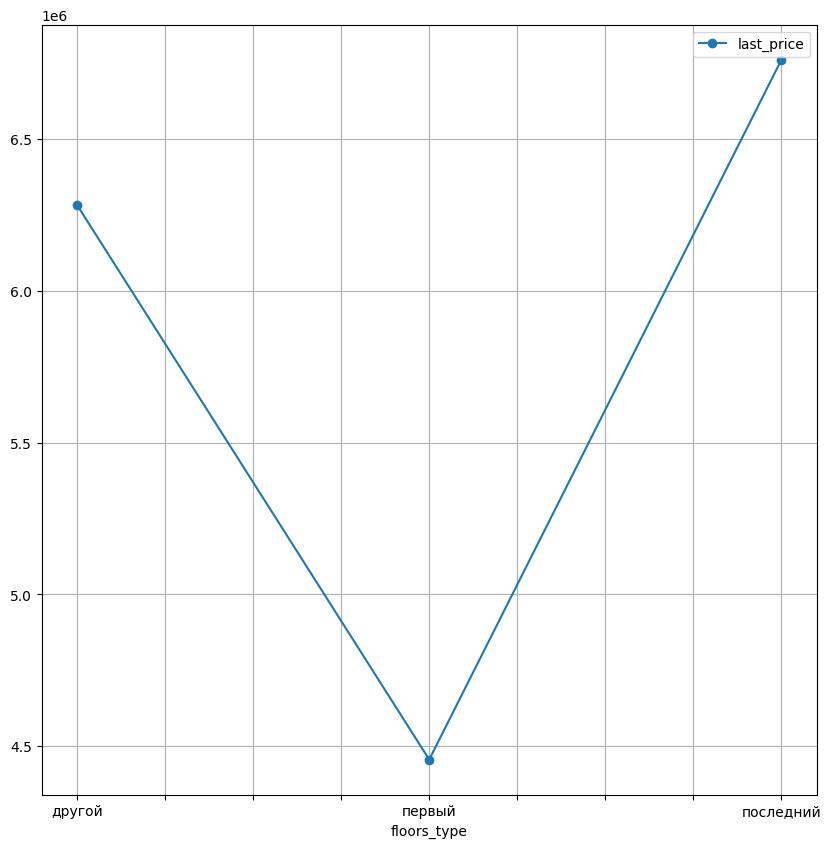

In [163]:
data.pivot_table(index='floors_type', values='last_price').plot(grid=True, style='o-',figsize=(10, 10))

0.001739576635169679


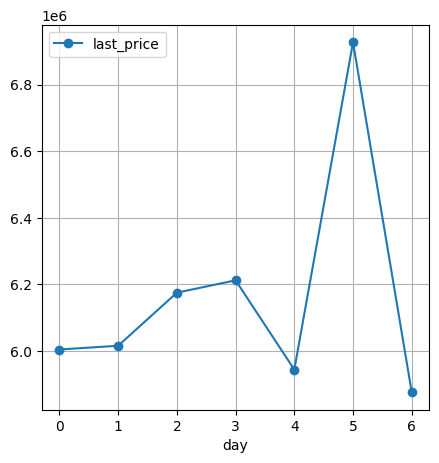

In [164]:
data.pivot_table(index='day', values='last_price').plot(grid=True, style='o-',figsize=(5, 5))
print(data['price_meter'].corr(data['day']))

<Axes: xlabel='month'>

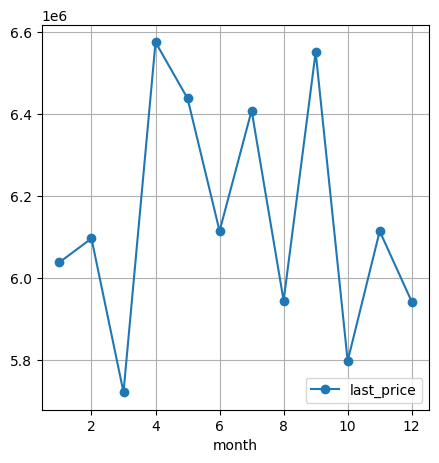

In [165]:
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-',figsize=(5, 5))

<Axes: xlabel='year'>

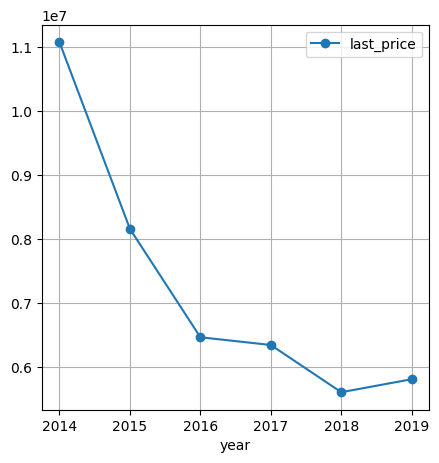

In [166]:
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-',figsize=(5, 5))

In [167]:
#теперь среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [168]:
price = data.pivot_table(index='locality_name', values='price_meter', aggfunc=['count', 'mean'])
price.columns = ['count', 'mean']
price = price.sort_values('count', ascending=False).head(10)

price

,count,mean
locality_name,,
Санкт-Петербург,13164,112358.770852
Мурино,533,86472.931519
Шушары,397,78350.380359
Всеволожск,327,69029.983064
Колпино,302,75100.965066
Парголово,295,89804.609283
Пушкин,292,102493.871452
Кудрово,280,93132.395490
Гатчина,254,68282.704771


In [169]:

print(price['mean'].max())
print(price['mean'].min())

112358.77085246294
57286.238614203605


<div class="alert alert-info"> <b>Комментарий: </b>макисмум в самом Питере, минимум в Выборге</div>

In [170]:


price_spb = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='distance_km',values = 'price_meter',aggfunc = 'mean')

price_spb

,price_meter
distance_km,
0.0,203101.751917
1.0,161631.854691
2.0,156409.460093
3.0,117514.729572
4.0,131944.958862
5.0,137590.691426
6.0,147934.429121
7.0,150001.883164
8.0,123203.777717


<Axes: title={'center': 'Стоимость 1 км в Питере'}, xlabel='distance_km'>

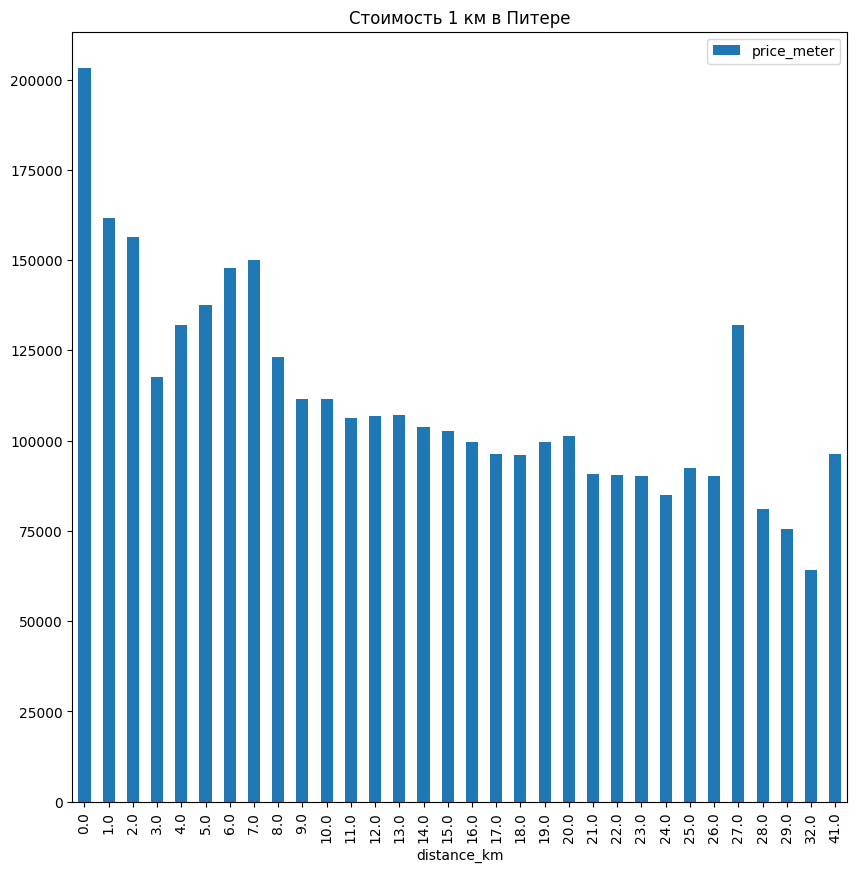

In [171]:
price_spb.plot(kind = 'bar',figsize = (10,10), title = 'Стоимость 1 км в Питере')

### Общий вывод

<div class="alert alert-info">

    изучили данные

    поменяли им тип

    удалили неявные дубликаты в пунктах

    разобрались с балконами

    добавили немножко столбцов

    сделали вывод о цене
Важнее всего для квартиры окакзалась кухня (ее площадь), расположение квартиры, год. Дороже всего можно продать квартиру скорее всего по субботам октября.

</div>
